# EDA Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import os
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

### Firstly, we will combine the two dataframes.

In [2]:
# Define filenames
base_furniture_file = "furniture_data.csv"
sliding_furniture_file = "furniture_sliding_data.csv"

# Check if files exist
if not (os.path.exists(base_furniture_file) and os.path.exists(sliding_furniture_file)):
    raise FileNotFoundError("One or both input CSV files are missing.")

# Load dataframes
base_furniture_df = pd.read_csv(base_furniture_file)
sliding_furniture_df = pd.read_csv(sliding_furniture_file)

# Check for consistent columns before concatenation
if base_furniture_df.columns.tolist() != sliding_furniture_df.columns.tolist():
    raise ValueError("Dataframes have inconsistent columns. Check the CSV files.")

# Concatenate dataframes
full_furniture_df = pd.concat([base_furniture_df, sliding_furniture_df], axis=0)

In [3]:
print("\n--- Checking for Imbalanced Data (Furniture_Category) ---\n")

category_counts = base_furniture_df['Furniture_Category'].value_counts()
print("Value Counts:\n", category_counts)


--- Checking for Imbalanced Data (Furniture_Category) ---

Value Counts:
 Furniture_Category
lamps       32402
chairs      22053
tables      17100
dressers     7871
beds         6578
sofas        4080
Name: count, dtype: int64


In [4]:
# 1. Calculate Class Proportions:
category_proportions = category_counts / len(base_furniture_df)
print("\nClass Proportions:\n", category_proportions)


Class Proportions:
 Furniture_Category
lamps       0.359687
chairs      0.244805
tables      0.189823
dressers    0.087374
beds        0.073021
sofas       0.045291
Name: count, dtype: float64


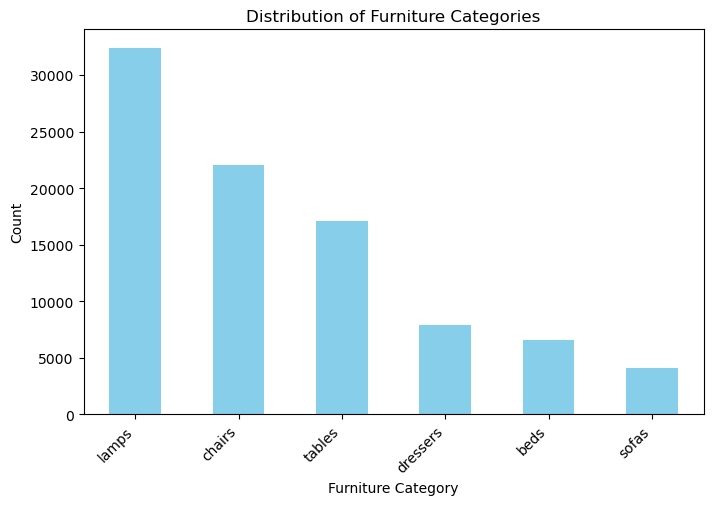

In [5]:
# 2. Visualize Class Distribution:
plt.figure(figsize=(8, 5))
category_counts.plot.bar(color='skyblue')
plt.title('Distribution of Furniture Categories')
plt.xlabel('Furniture Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Let's print dataframe shape. 

In [6]:
# Print dataframe shape
print("Shape of the combined dataframe:", full_furniture_df.shape)

Shape of the combined dataframe: (442308, 3)


### Now we will analyze furniture category.

In [7]:
print("\n--- Furniture Category Analysis ---\n")
category_counts = full_furniture_df['Furniture_Category'].value_counts()
print("Value counts for Furniture_Category:\n", category_counts)


--- Furniture Category Analysis ---

Value counts for Furniture_Category:
 Furniture_Category
chairs      80415
sofas       80012
dressers    77193
beds        75159
tables      72155
lamps       57374
Name: count, dtype: int64


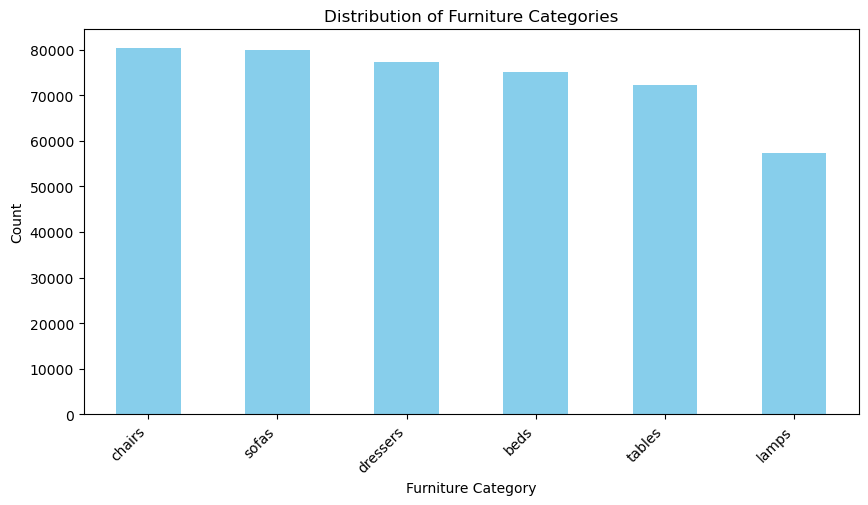

In [8]:
plt.figure(figsize=(10, 5)) # Adjust figure size if needed
category_counts.plot.bar(color='skyblue')
plt.title('Distribution of Furniture Categories')
plt.xlabel('Furniture Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.show()

### Then we will analyze furniture type.

In [9]:
print("\n--- Furniture Type Analysis ---\n")
type_counts = full_furniture_df['Furniture_Type'].value_counts()
print("Value counts for Furniture_Type:\n", type_counts)


--- Furniture Type Analysis ---

Value counts for Furniture_Type:
 Furniture_Type
Scandinavian     30801
Southwestern     30687
Eclectic         30245
Rustic           29454
Tropical         29057
Craftsman        27938
Beach            27858
Asian            27137
Mediterranean    26587
Victorian        26284
Midcentury       25648
Industrial       25471
Farmhouse        24761
Traditional      21847
Modern           21424
Transitional     19504
Contemporary     17605
Name: count, dtype: int64


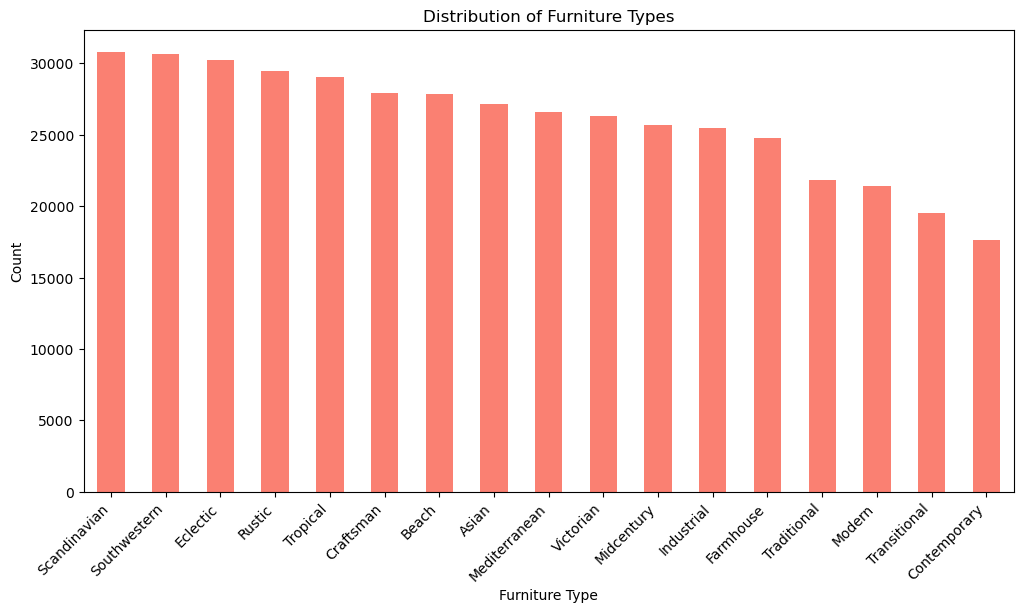

In [10]:
plt.figure(figsize=(12, 6)) 
type_counts.plot.bar(color='salmon')
plt.title('Distribution of Furniture Types')
plt.xlabel('Furniture Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

### Next we will analyze relationship between category and type.

In [11]:
print("\n--- Relationship between Category and Type ---\n")
category_type_counts = full_furniture_df.groupby('Furniture_Category')['Furniture_Type'].value_counts()
print(category_type_counts)


--- Relationship between Category and Type ---

Furniture_Category  Furniture_Type
beds                Victorian         5229
                    Farmhouse         5187
                    Southwestern      5145
                    Beach             5101
                    Asian             5044
                                      ... 
tables              Contemporary      3177
                    Industrial        2661
                    Modern            2272
                    Farmhouse         1279
                    Midcentury        1194
Name: count, Length: 102, dtype: int64


### Stacked Bar Chart

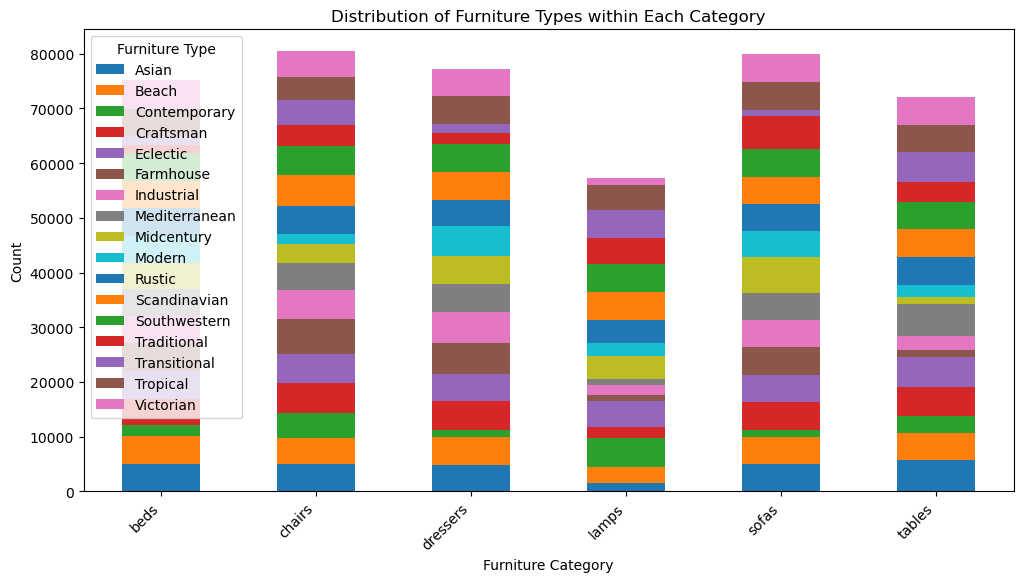

In [12]:
category_type_df = category_type_counts.unstack(fill_value=0)
category_type_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Furniture Types within Each Category')
plt.xlabel('Furniture Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Furniture Type')
plt.show()

### Heatmap

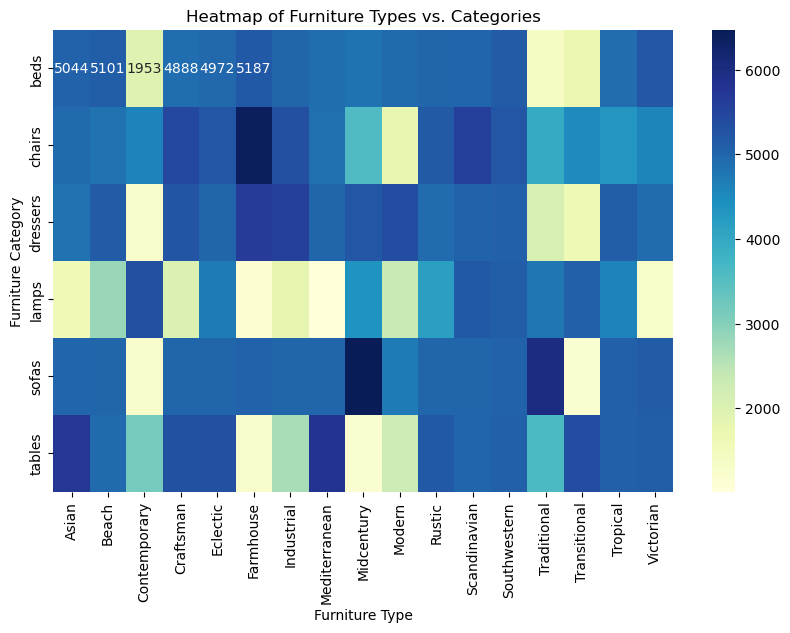

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(category_type_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Furniture Types vs. Categories')
plt.xlabel('Furniture Type')
plt.ylabel('Furniture Category')
plt.show()

In [14]:
print("\n--- Furniture Category and Type Analysis ---\n")

category_type_counts = full_furniture_df.groupby('Furniture_Category')['Furniture_Type'].value_counts()
print("Value counts of Furniture Types within each Category:\n", category_type_counts)


--- Furniture Category and Type Analysis ---

Value counts of Furniture Types within each Category:
 Furniture_Category  Furniture_Type
beds                Victorian         5229
                    Farmhouse         5187
                    Southwestern      5145
                    Beach             5101
                    Asian             5044
                                      ... 
tables              Contemporary      3177
                    Industrial        2661
                    Modern            2272
                    Farmhouse         1279
                    Midcentury        1194
Name: count, Length: 102, dtype: int64


In [15]:
categorical_folders = full_furniture_df["Furniture_Category"].unique()
print(categorical_folders)

num_classes = full_furniture_df["Furniture_Category"].nunique()
print("Number of classes:", num_classes)

['beds' 'chairs' 'dressers' 'lamps' 'sofas' 'tables']
Number of classes: 6


NameError: name 'furniture_df' is not defined

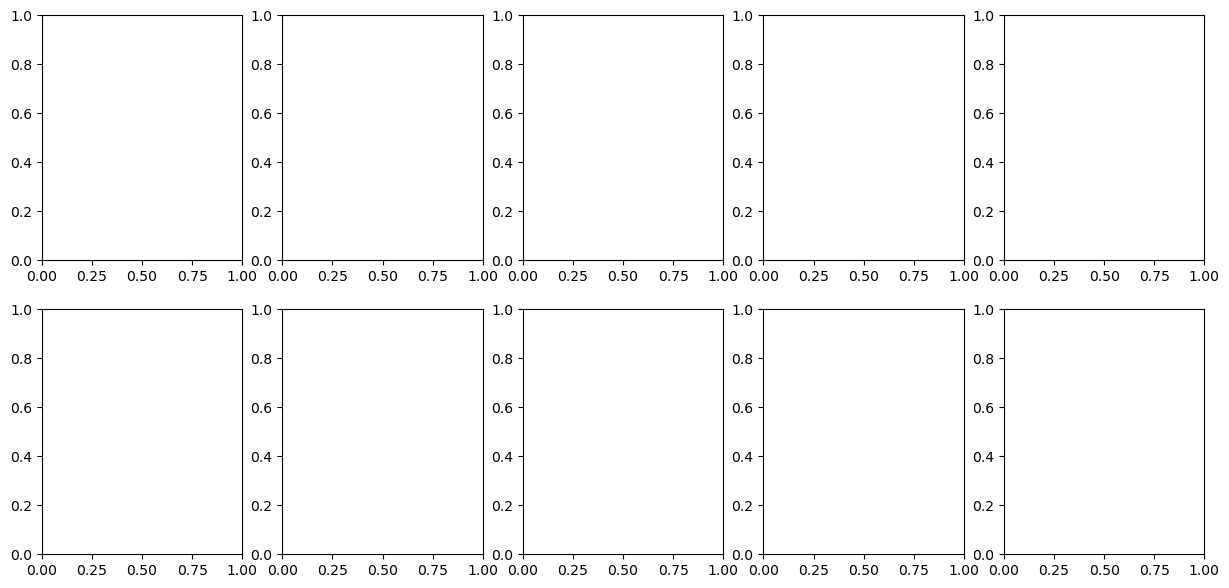

In [22]:
# Check image for image overview
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for i, ax in enumerate(axes.flat):
    # Get the image path from the DataFrame
    image_path = full_furniture_df.loc[i, "Image_Path"]  

    try:
        # Open the image
        image_overview = Image.open(image_path)

        # Display the image
        ax.imshow(image_overview)

        # Get image dimensions
        width, height = image_overview.size
        ax.set_title(f"{furniture_df.loc[i, 'Furniture_Category']}: {width} x {height}") 

    except FileNotFoundError:
        print(f"Error: Image not found at path: {image_path}")

plt.tight_layout()
plt.show() 

# The End of EDA Notebook.